<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [13]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [5]:
# Read CSV
house = pd.read_csv('E:/IOD_data/Sacramento_transactions.csv')

In [6]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [9]:
# no null values
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

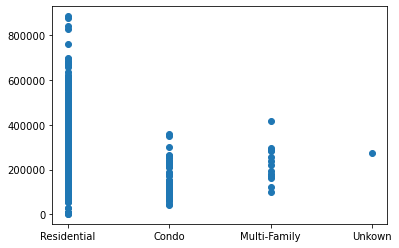

In [30]:
plt.scatter(house['type'], house['price'])

In [32]:
# only one unknown, will be removed as there is zero sq__ft, zero beds and baths
house[house['type'] == 'Unkown']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183


<AxesSubplot:xlabel='beds', ylabel='baths'>

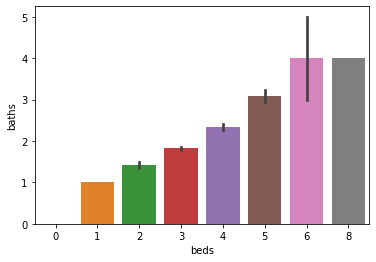

In [18]:
sns.barplot(x= house['beds'], y =house['baths'])

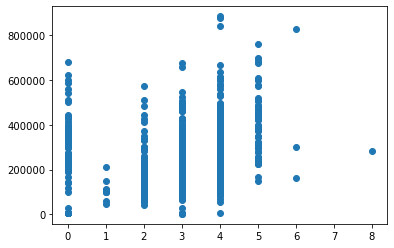

In [20]:
plt.scatter(house['beds'], house['price'])

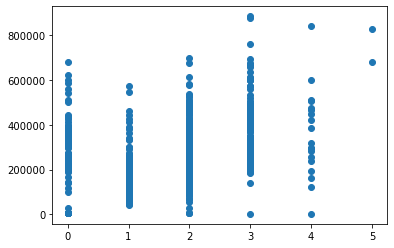

In [21]:
plt.scatter(house['baths'], house['price'])

In [28]:
house[house['type'] == 'Unkown']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183


In [37]:
house['Noval'] = 0

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Noval
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0


In [39]:

for i in house.index:
    if house.iloc[i,4] ==0 and house.iloc[i,5] ==0 and house.iloc[i,6]==0:
        house.iloc[i,12] = 1
    else:
        continue
        
        


In [44]:
house_noval = house[house['Noval'] == 1]
house_noval

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Noval
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880,1
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970,1
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141,1
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600,1
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277,1
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609,1
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222,1
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539,1


In [45]:
house_val = house[house['Noval'] == 0]
house_val

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Noval
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,0
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,0
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,0
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,0


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

price as this what we want to predict


#### 2.2 List all possible variables which might be Predictor variable.

beds, baths, sq__ft, zip, type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [49]:
# ANSWER
house_corr = house.corr()
house_corr.iloc[4]

zip         -0.093353
beds         0.342024
baths        0.416208
sq__ft       0.333897
price        1.000000
latitude    -0.039573
longitude    0.284485
Noval       -0.118143
Name: price, dtype: float64

beds, baths and sq__ft based on the size of the correlation coefficient

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [85]:
# get ratio of sq__ft to price
house_val = pd.DataFrame(house_val)
house_val_1 = house_val[house_val['sq__ft'] >0]
p_sqft_ratio =  house_val_1['price'] / house_val_1['sq__ft']
ratio_mean = p_sqft_ratio.mean()



#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [83]:
# ANSWER
sample_1 = house_val_1.sample(1)
predict_price = sample_1.iloc[0,6] * ratio_mean
residuals = abs(predict_price - sample_1.iloc[0,9])
residuals

3285.3092578226933

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [86]:
# ANSWER
x = house_val_1['sq__ft']
y = house_val_1['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [88]:
# ANSWER
x_mean = x.mean()
y_mean = y.mean()


x_diff = (x - x_mean)
y_diff = (y - y_mean)
xy_diff = x_diff * y_diff
x_diff_sq = np.square(x_diff)
x_diff_sum = x_diff_sq.sum()
xy_diff_sum = xy_diff.sum()

b1 = xy_diff_sum / x_diff_sum
b1


125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [89]:
# ANSWER
b0 = y_mean - (b1 * x_mean)
b0

30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [90]:
# ANSWER
y_hat = b0 + (b1 * x)
y_hat

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [97]:
# ANSWER
res = y - y_hat
res

0      -75669.616731
1     -108126.273822
2      -61002.957264
3      -67588.080518
4      -48108.173751
           ...      
980    -83279.223497
981     18844.615307
982     52526.118330
983     -5899.413922
984     34982.511275
Length: 814, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [99]:
# ANSWER
ss_res = np.square(res).sum()
ss_total = np.square(y - y_mean)
ss_total = ss_total.sum()
r_sq = 1 - (ss_res / ss_total)
r_sq

0.4812307133326901

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [0]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [0]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [101]:
# ANSWER
p_price = b0 = (b1*1204)
p_price

150760.64996253292



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



